<a href="https://colab.research.google.com/github/sreehari-aot/sentiment-analysis-fine-tune/blob/main/Sentiment_analysis_fine_tuned_service_bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! pip install transformers[sentencepiece] -Uqq

In [8]:
import numpy as np
from transformers import AutoTokenizer
from transformers import AutoModel
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from transformers import TrainingArguments

In [9]:
import pandas as pd

In [10]:
dataset = pd.read_csv('SeriveBC_reviews - SeriveBC_reviews.csv')

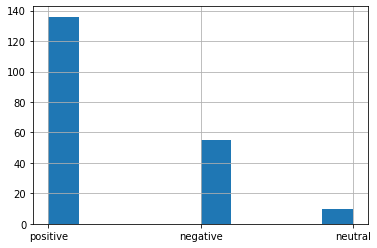

In [11]:
import matplotlib.pyplot as plt
dataset['labels'].hist()

Looks like the dataset is biased towards positive feed back 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
! pip install datasets -Uqq

     |████████████████████████████████| 311 kB 4.2 MB/s 
     |████████████████████████████████| 212 kB 34.0 MB/s 
     |████████████████████████████████| 1.1 MB 56.4 MB/s 
     |████████████████████████████████| 134 kB 51.5 MB/s 
     |████████████████████████████████| 144 kB 42.6 MB/s 
     |████████████████████████████████| 271 kB 43.5 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 


In [14]:
from datasets import load_dataset

In [15]:
dataset = load_dataset('csv', data_files='SeriveBC_reviews - SeriveBC_reviews.csv')

Using custom data configuration default-5f40c25e8cf10526


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-5f40c25e8cf10526/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['feedback', 'labels'],
        num_rows: 201
    })
})

In [17]:
dataset = dataset['train']

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['labels']):
  strat_train_set = dataset[train_index]
  strat_test_set = dataset[test_index]

In [19]:
train_dataframe = pd.DataFrame(strat_train_set['labels'])
test_dataframe = pd.DataFrame(strat_test_set['labels'])

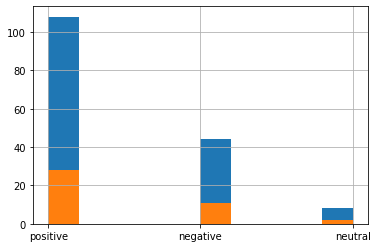

In [20]:
train_dataframe[0].hist()
test_dataframe[0].hist()

In [21]:
checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [22]:
test = pd.read_csv('SeriveBC_reviews - SeriveBC_reviews.csv')


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
test['labels'] = label_encoder.fit_transform(test['labels'])

In [25]:
import pyarrow as pa
s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in s.split(test, test['labels']):
  train_set = test.loc[train_index]
  test_set = test.loc[test_index]



In [34]:
import datasets
d = datasets.DatasetDict({"train":datasets.Dataset(pa.Table.from_pandas(train_set)),"test":datasets.Dataset(pa.Table.from_pandas(test_set))})


# New Section

In [35]:
d['train'][0]

{'__index_level_0__': 24,
 'feedback': 'Always happy & has a great experience with staffs there! Very friendly & very helpful',
 'labels': 2}

In [36]:
d.reset_format()

In [37]:
d['train'][0]

{'__index_level_0__': 24,
 'feedback': 'Always happy & has a great experience with staffs there! Very friendly & very helpful',
 'labels': 2}

In [38]:
def tokenize_function(examples):
    return tokenizer(examples["feedback"], padding=True, truncation=True)


tokenized_datasets = d.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [39]:
tokenized_datasets['train'][0]

{'__index_level_0__': 24,
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [40]:
tokenized_datasets = tokenized_datasets.remove_columns(["feedback", "__index_level_0__"])
tokenized_datasets.set_format("torch")

In [43]:
tokenized_datasets['train'][0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0

In [44]:
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

In [45]:
full_train_dataset["labels"]

tensor([2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
        2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0,
        0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1])

In [46]:
full_train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0

In [47]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from datasets import load_metric

In [48]:
metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

In [49]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [50]:
training_args = TrainingArguments("test_trainer")

In [51]:
trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=full_train_dataset,
                  eval_dataset=full_eval_dataset,
                  tokenizer=tokenizer)
trainer.train();

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 160
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 60


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




In [52]:
trainer.evaluate()


***** Running Evaluation *****
  Num examples = 41
  Batch size = 8


{'epoch': 3.0,
 'eval_accuracy': 0.9024390243902439,
 'eval_loss': 0.32151830196380615,
 'eval_runtime': 6.3133,
 'eval_samples_per_second': 6.494,
 'eval_steps_per_second': 0.95}